# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
env_info = env.reset(train_mode=True)[brain_name]
print(f'Agents: {len(env_info.agents)}, each action size {brain.vector_action_space_size}')

Agents: 1, each action size 4


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Actor(nn.Module):

    def __init__(self, inputs, outputs, hidden_layers=(128, 256), device='cpu'):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(inputs, hidden_layers[0])
        f1 = 1 / np.sqrt(self.fc1.weight.data.size()[0])
        nn.init.uniform_(self.fc1.weight.data, -f1, f1)
        nn.init.uniform_(self.fc1.bias.data, -f1, f1)

        self.bn1 = nn.LayerNorm(hidden_layers[0])
        self.hidden_layers = nn.ModuleList()
        self.hidden_norms = nn.ModuleList()
        for i in range(len(hidden_layers)-1):
            self.hidden_layers.append(
                nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            fn = 1 / np.sqrt(self.hidden_layers[i].weight.data.size()[0])
            nn.init.uniform_(self.hidden_layers[i].weight.data, -fn, fn)
            nn.init.uniform_(self.hidden_layers[i].bias.data, -fn, fn)
            self.hidden_norms.append(nn.LayerNorm(hidden_layers[i+1]))

        self.output = nn.Linear(hidden_layers[-1], outputs)
        self.to(torch.device(device))

    def forward(self, X):
        X = F.relu(self.bn1(self.fc1(X)))
        for i in range(len(self.hidden_layers)):
            X = F.relu(self.hidden_norms[i](self.hidden_layers[i](X)))

        return torch.tanh(self.output(X))


class Critic(nn.Module):

    def __init__(self, inputs, outputs, hidden_layers=(128, 256), device='cpu'):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(inputs, hidden_layers[0])
        f1 = 1 / np.sqrt(self.fc1.weight.data.size()[0])
        nn.init.uniform_(self.fc1.weight.data, -f1, f1)
        nn.init.uniform_(self.fc1.bias.data, -f1, f1)

        self.bn1 = nn.LayerNorm(hidden_layers[0])
        self.hidden_layers = nn.ModuleList()
        self.hidden_norms = nn.ModuleList()
        for i in range(len(hidden_layers)-1):
            self.hidden_layers.append(
                nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            fn = 1 / np.sqrt(self.hidden_layers[i].weight.data.size()[0])
            nn.init.uniform_(self.hidden_layers[i].weight.data, -fn, fn)
            nn.init.uniform_(self.hidden_layers[i].bias.data, -fn, fn)
            self.hidden_norms.append(nn.LayerNorm(hidden_layers[i+1]))
        self.output = nn.Linear(hidden_layers[-1], outputs)
        self.to(torch.device(device))

    def forward(self, X1, X2):
        X = torch.cat([X1, X2], 1)  # concatenate states and actions by columns
        X = F.relu(self.bn1(self.fc1(X)))
        for i in range(len(self.hidden_layers)):
            X = F.relu(self.hidden_norms[i](self.hidden_layers[i](X)))

        return self.output(X)


In [8]:
from collections import deque
import random


class ReplayBuffer:

    def __init__(self, cap=512):
        self.buffer = deque(maxlen=cap)

    def push(self, state, action, reward, next_state, done):
        experience = (state, action, reward, next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        states, actions, rewards, next_states, dones = zip(
            *random.sample(self.buffer, batch_size))
        return np.vstack(states), np.vstack(actions), np.vstack(rewards), np.vstack(next_states), np.vstack(dones)

    def __len__(self):
        return len(self.buffer)


In [9]:
def hard_copy(net: nn.Module, target_net: nn.Module):
    for param, target_param in zip(net.parameters(), target_net.parameters()):
        target_param.data.copy_(param.data)


def soft_copy(net: nn.Module, target_net: nn.Module, tau=1e-2):
    for param, target_param in zip(net.parameters(), target_net.parameters()):
        target_param.data.copy_(
            param.data * tau + target_param.data * (1.0 - tau))


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline


class OUNoise(object):
    def __init__(self, action_space, mu=0.0, theta=0.15, max_sigma=0.3, min_sigma=0.1, decay_period=100000):
        self.mu = mu
        self.theta = theta
        self.sigma = max_sigma
        self.max_sigma = max_sigma
        self.min_sigma = min_sigma
        self.decay_period = decay_period
        self.action_dim = action_space
        self.low = -1.0
        self.high = 1.0
        self.reset()

    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu

    def evolve_state(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * \
            np.random.randn(self.action_dim)
        self.state = x + dx
        return self.state

    def get_action(self, action, t=0):
        ou_state = self.evolve_state()
        self.sigma = self.max_sigma - \
            (self.max_sigma - self.min_sigma) * min(1.0, t / self.decay_period)
        return np.clip(action + ou_state, self.low, self.high)


In [11]:
!mkdir experiments

mkdir: cannot create directory ‘experiments’: File exists


In [18]:
def plot_rewards(rewards, average=None, goal=30, title=None, filename=None):
    plt.plot(rewards, label='Reward')
    if average is not None:
        plt.plot(average, label='Average Reward')
    plt.plot([goal] * len(rewards), linestyle='--', label='Goal')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title(title)
    plt.legend()

    if filename is not None:
        plt.savefig(filename)

    plt.show()

In [20]:
import torch.optim as optim
import gc

NUM_EPISODES = 500
BATCH_SIZE = 64
NET_UPD = 15
GAMMA = 0.99
TAU = 1e-2
ACTOR_LR = 1e-4
CRITIC_LR = 1e-3
BUFFER_LEN = 500_000

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device in use: {device}')

num_states = env_info.vector_observations.shape[1]
num_actions = brain.vector_action_space_size

actor = Actor(num_states, num_actions, hidden_layers=(300, 400), device=device)
actor_target = Actor(num_states, num_actions,
                     hidden_layers=(300, 400), device=device)
hard_copy(actor, actor_target)

print(f'Actor {actor}')

critic = Critic(num_states + num_actions, action_size,
                hidden_layers=(300, 400), device=device)
critic_target = Critic(num_states + num_actions, action_size,
                       hidden_layers=(300, 400), device=device)
hard_copy(critic, critic_target)

print(f'Critic {critic}')

criterion = nn.MSELoss()
actor_optim = optim.Adam(actor.parameters(), lr=ACTOR_LR)
critic_optim = optim.Adam(critic.parameters(), lr=CRITIC_LR)

replay_buffer = ReplayBuffer(cap=BUFFER_LEN)

noise = OUNoise(num_actions)


def update_agent():
    states, actions, rewards, next_states, _ = replay_buffer.sample(BATCH_SIZE)
    states = torch.from_numpy(states).float().to(device)
    actions = torch.from_numpy(actions).float().to(device)
    rewards = torch.from_numpy(rewards).float().to(device)
    next_states = torch.from_numpy(next_states).float().to(device)

    Qval = critic.forward(states, actions)
    next_actions = actor_target.forward(next_states)
    nextQ = critic_target.forward(next_states, next_actions.detach())
    Qprime = rewards + GAMMA * nextQ

    critic_loss = criterion(Qval, Qprime)
    actor_loss = -critic.forward(states, actor.forward(states)).mean()

    actor_optim.zero_grad()
    actor_loss.backward()
    actor_optim.step()

    critic_optim.zero_grad()
    critic_loss.backward()
    nn.utils.clip_grad_norm_(critic.parameters(), 1)
    critic_optim.step()

    soft_copy(actor, actor_target)
    soft_copy(critic, critic_target)


@torch.no_grad()
def get_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0).to(device)
    action = actor.forward(state)
    return action.cpu().detach().numpy()[0]

@torch.no_grad()
def prefill_buffer(partition=10, seed=42):
    '''
    Prefill hald of replay buffer with non zero reward experieces
    '''
    np.random.seed(seed)
    # random.seed(seed)
    while len(replay_buffer) < BUFFER_LEN / partition:
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        noise.reset()
        step = 0
        while True:
            step += 1
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)  
            actions = noise.get_action(actions, step)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            if (np.sum(rewards) > 0.):
                replay_buffer.push(states, actions, rewards, next_states, dones)
                print(f'\rReplay buffer size {len(replay_buffer)}', end='')

            states = next_states
            if np.any(dones):
                break

    np.random.seed()

prefill_buffer(partition=100)
print('\n')
episode_rewards = []
avg_rewards = []
total_steps = 0
for e in range(NUM_EPISODES):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    noise.reset()
    step = 0
    ep_reward = 0
    while True:
        step += 1

        actions = get_action(states)
        actions = noise.get_action(actions, step)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        replay_buffer.push(states, actions, rewards, next_states, dones)
        if len(replay_buffer) > BATCH_SIZE and (step+1) % 20 == 0:
            for i in range(NET_UPD):
                update_agent()

        states = next_states
        ep_reward += np.sum(rewards)
        if np.any(dones) or (step > 300 and ep_reward == 0.):
            break

    episode_rewards.append(ep_reward)
    avg_rewards.append(np.mean(episode_rewards[-10:]))
    total_steps += step
    print(
        f'\rEpisode {e} reward {ep_reward:.3f} and average reward {avg_rewards[-1]:.3f} after {total_steps} steps', end='')
    gc.collect()

    if len(episode_rewards[-30:]) >= 30 and np.min(episode_rewards[-30:]) > 30.:
        print(f'Early stop at episode {e}; Goal has been reached; Mean reward in the last 30 episodes {np.mean(episode_rewards[-30:])}')
        break

device in use: cuda
Actor Actor(
  (fc1): Linear(in_features=33, out_features=300, bias=True)
  (bn1): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=300, out_features=400, bias=True)
  )
  (hidden_norms): ModuleList(
    (0): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
  )
  (output): Linear(in_features=400, out_features=4, bias=True)
)
Critic Critic(
  (fc1): Linear(in_features=37, out_features=300, bias=True)
  (bn1): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=300, out_features=400, bias=True)
  )
  (hidden_norms): ModuleList(
    (0): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
  )
  (output): Linear(in_features=400, out_features=4, bias=True)
)
Replay buffer size 5010

Episode 499 reward 32.630 and average reward 31.874 after 499800 steps

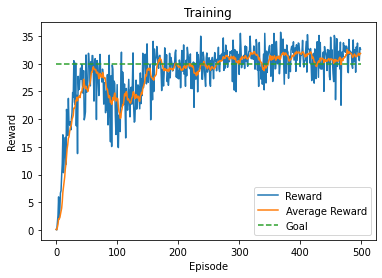

In [25]:
plot_rewards(episode_rewards, average=avg_rewards, title="Training", filename='experiments/64b15nu20s5000pfcg.jpeg')

In [29]:
# Evaluation
def evaluate(model, n=100):
    eval_rewards = []
    for e in range(n):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations

        ep_reward = 0
        while True:
            state = torch.from_numpy(states).float().unsqueeze(0).to(device)
            actions = model.forward(state)
            actions = actions.cpu().detach().numpy()[0]

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            ep_reward += np.sum(rewards)
            states = next_states
            if np.any(dones):
                break
        
        eval_rewards.append(ep_reward)
        print(f'\rEvaluation #{e+1} finished with reward {ep_reward}', end='')
    
    return eval_rewards

eval_rewards = evaluate(actor_target)

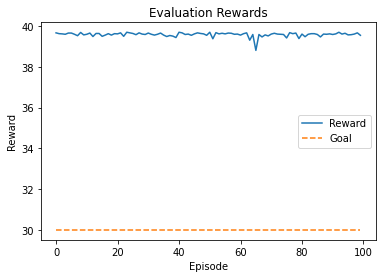

In [26]:
plot_rewards(eval_rewards, title='Evaluation Rewards', filename='experiments/ex6eval.jpeg')

In [33]:
torch.save(actor_target, 'actor.pt')

In [34]:
loaded = torch.load('actor.pt')
evaluate(loaded.eval(), n=1)

Evaluation #1 finished with reward 39.70999911241233

[39.70999911241233]

# Report

For the implementation **DDPG** algorithm was chosen.
The implementation follows the original paper with some deviations described below in [Experiments](#Experiments).

## Networks

As the [paper](https://arxiv.org/abs/1509.02971) suggests 4 networks are used. 2 for Critics and 2 for Actors.
Final solution uses Actor and Critic network to update their target networks every 20 time-steps. Update routine was repeated 15 times on each iteration.

### Architecture

Both network contain exactly the same architecture, just the Actor network has `tanh` activation function on the output layer to set values between -1 and 1.
As per paper Linear layers are adjusted with batch normalization - in `pytorch` terms - LayerNorm.
Initial weights and biases set to standard deviation.

```python
Actor(
  (fc1): Linear(in_features=33, out_features=300, bias=True)
  (bn1): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=300, out_features=400, bias=True)
  )
  (hidden_norms): ModuleList(
    (0): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
  )
  (output): Linear(in_features=400, out_features=4, bias=True)
)
```

```python
Critic(
  (fc1): Linear(in_features=37, out_features=300, bias=True)
  (bn1): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=300, out_features=400, bias=True)
  )
  (hidden_norms): ModuleList(
    (0): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
  )
  (output): Linear(in_features=400, out_features=4, bias=True)
)
```

To insure IID (independent and identically distributed) principal - Replay Buffer was used. Experiences were randomly sampled from it.

In various experiments the buffer was pre-filled by non zero reward experiences obtained by the Random Agent. This approach is not suitable for all environments in particular for those with large state space size. Despite that - in this environment it showed fast start. Personally, consider it as a dummy way of transfer learning - when the agent was shown to external experiences.

2 Approaches were taken to update network.

1. More aggressive network parameters Soft update. Different $\tau$ parameters were used as well as number of updates per step was used. For instance updating network parameters 20 times per time-step showed stable performance growth - Experiment 2.
2. Updating Networks every N time-steps for M times. - Which was used in the last solution

Overall DDPG showed good and stable performance

#### Training

![training graph](experiments/64b15nu20s5000pfcg.jpeg)

#### Evaluation results

![evaluation graph](experiments/ex6eval.jpeg)

## Hyperparameters

All parameters were taken from the paper with no change.

$\gamma=0.99$

$\tau=1e-2$

$\alpha_{actor}=1e-4$ - Actor learning rate

$\alpha_{critic}=1e-3$ - Critic learning rate

Ornstein-Uhlenbeck Process

$\mu=0.0$

$\theta=0.15$

$\sigma_{max}=0.3$

$\sigma_{min}=0.1$

$p_{decay}=100000$ - decay period

Replay Buffer

$size=500000$

## Experiments

### Experiment 1

#### Parameters

- Batch size 256
- Pre-filled buffer length about 5000 experiences
- Steps $500*10^3$
- Aggressive Soft update with factor 5

> Result - No solution in 500 episodes
  
![experiment](experiments/256b5bu5000pf.jpeg)

### Experiment 2

#### Parameters

- Batch size 256
- Pre-filled buffer length about 5000 experiences
- Steps $500*10^3$
- Aggressive Soft update with factor 10

> Result - No solution in 500 episodes

![experiment](experiments/256b10bu5000pf.jpeg)  

### Experiment 3

#### Parameters

- Batch size 256
- Pre-filled buffer length about 5000 experiences
- Steps $1.5*10^6$
- Regular Soft update

> Result - Converged in less than 500 episodes.
> !!! **Could not reproduce in consequent runs**
  
![experiment](experiments/256b10bu5000pf.jpeg)

### Experiment 4

#### Parameters

- Batch size 256
- No pre-filled Replay Buffer
- Steps $1.5*10^6$
- Regular Soft update

> Result - No solution in 1500 episodes

![experiment](experiments/256b1bu0pf.jpeg)

### Experiment 5

#### Parameters

- Batch size 256
- Pre-filled buffer length about 5000 experiences
- Steps $500*10^3$
- Regular Soft update
- Critic's gradient clipping was applied

![experiment](experiments/256b1bu5000pfcg.jpeg)

### Experiment 6

#### Parameters

- Batch size 64
- Pre-filled buffer length about 5000 experiences
- Steps $500*10^3$
- Update networks 15 times every 20 steps
- Critic's gradient clipping was applied

![experiment](experiments/64b15nu20s5000pfcg.jpeg)

#### Evaluation results

![evaluation](experiments/ex6eval.jpeg)

## Further improvements

The agent can benefit from an environment with multiple agents. There are 2 possible improvements.
First, shared Replay Buffer can be used. That would require minimum changes in the current implementation. DDPG still can be used.
Different algorithms, especially those for multiple agents can be used. There is some interest in D4PG for such case.

Current solution supposed to have an early stop within 500 episodes. Unfortunately it was achieved only once and never been reproduced after. Addressing long training would be the first step. While experimenting, it was shown that smaller batch size (64) converges faster, that may signify that the current Network architecture struggles to optimize the function. Larger network may have different results.

In [35]:
env.close()